In [1]:
!pip install tsfel
!pip install pandas
!pip install numpy
!pip install sci-kit learn
!pip install matplotlib
import pandas as pd
import numpy as np
from itertools import product
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score
import matplotlib.pyplot as plt

In [ ]:
X_test = np.array(np.load('../X_test.npy'))
X_train = np.array(np.load('../X_train.npy'))
y_test = np.array(np.load('../y_test.npy'))
y_train = np.array(np.load('../y_train.npy'))

NameError: name 'np' is not defined

In [58]:

def decision_tree_TSEFL(depth = None):
    print(depth)
    

def decision_tree_features(depth = None):
    feature_labels = pd.read_csv(r'../HAR/UCI HAR Dataset/features.txt',sep = '\\s+',header=None)
    dataframeX = pd.read_csv(r'../HAR/UCI HAR Dataset/train/X_train.txt',sep = '\\s+',header=None)
    dataframeY = pd.read_csv(r'../HAR/UCI HAR Dataset/train/y_train.txt',sep = '\\s+',header=None)
    test_values_y = pd.read_csv(r'../HAR/UCI HAR Dataset/test/y_test.txt',sep = "\\s+",header=None)
    test_data_X = pd.read_csv(r'../HAR/UCI HAR Dataset/test/X_test.txt',sep = "\\s+",header=None)
    correlation_matrix = dataframeX.corr()
    threshold = 0.98
    removals = []
    # type(feature_labels[1])
    # count = 0
    # for i in range(len(feature_labels[1].duplicated())):
    #     if feature_labels[1].duplicated()[i] == True:
    #         count+=1

    #         print(i,feature_labels[1][i])
    # print(count)
    pairs = product(range(len(correlation_matrix.columns)), repeat=2)

    for i, j in pairs:
        if i > j:
            correlation_value = correlation_matrix.iloc[i, j]
            if abs(correlation_value) > threshold and correlation_value != 1:
                colname_i = correlation_matrix.columns[i]
                colname_j = correlation_matrix.columns[j]
                if colname_i not in removals and colname_j not in removals:
                    removals.append(colname_i)

    selected_features = [col for col in dataframeX.columns if col not in removals]
    filtered_dfX = dataframeX[selected_features]
    

    clf = tree.DecisionTreeClassifier(max_depth = depth)
    clf = clf.fit(filtered_dfX, dataframeY)
    # tree.plot_tree(clf)
    
    filtered_testx =test_data_X[selected_features]
    
    y_pred = clf.predict(filtered_testx)
    y_pred = np.array(y_pred)
    y_test = test_values_y[0].to_numpy()

    plt.figure(figsize=(20, 10))
    tree.plot_tree(clf, filled=True, feature_names=filtered_dfX.columns)
    plt.title('Decision Tree Visualization')
    plt.show()
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    precision = precision_score(y_test, y_pred,average='weighted')
    print(f"Precision: {precision}")
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"Recall: {recall}")
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)



    

Tree of Depth : 2


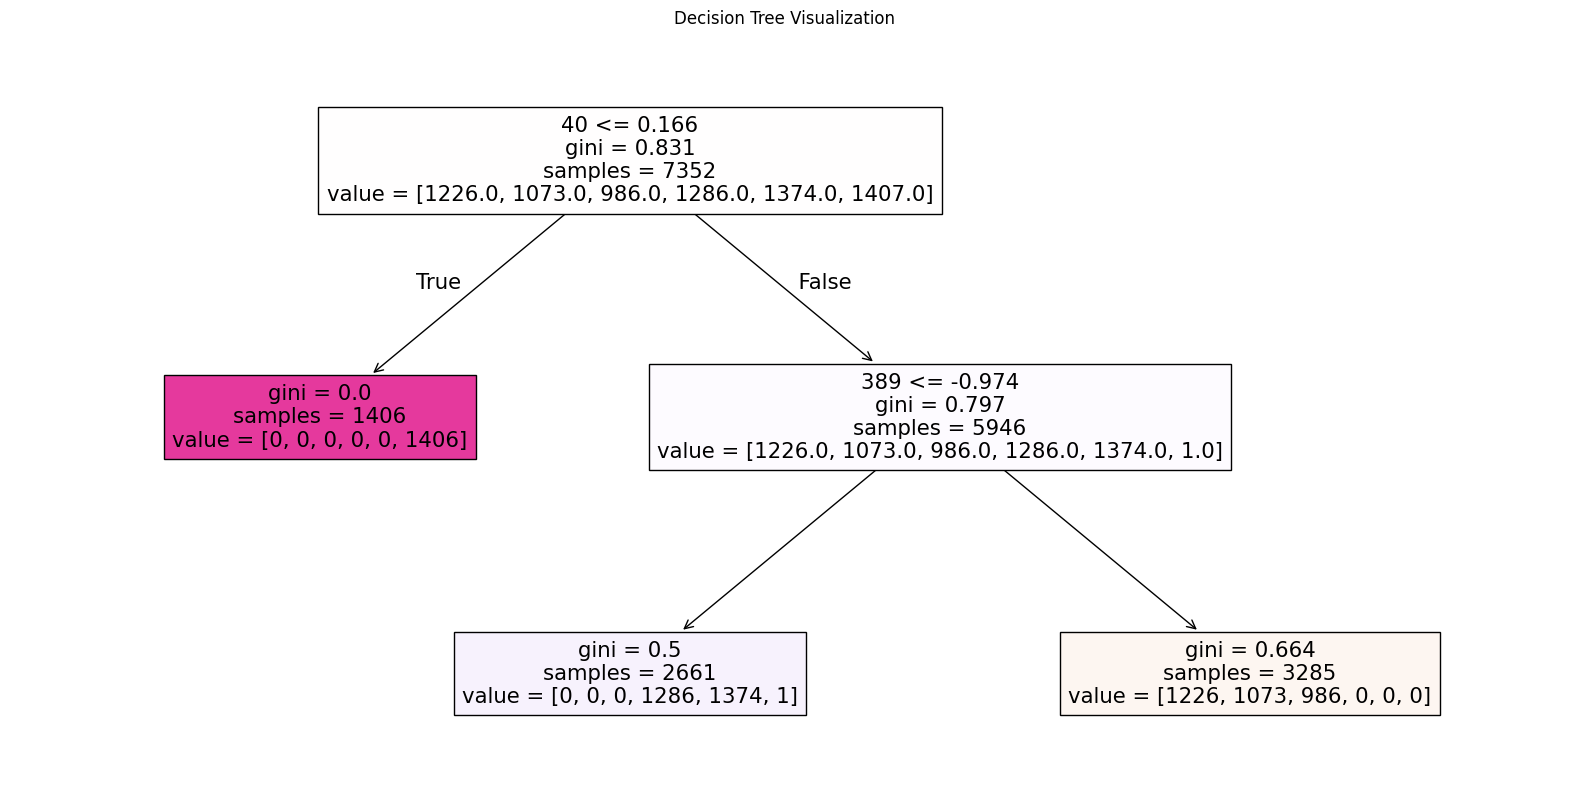

Accuracy: 0.5310485239226331
Precision: 0.33628556107901597
Recall: 0.5310485239226331
Confusion Matrix:
[[496   0   0   0   0   0]
 [471   0   0   0   0   0]
 [420   0   0   0   0   0]
 [  0   0   0   0 491   0]
 [  0   0   0   0 532   0]
 [  0   0   0   0   0 537]]
Tree of Depth : 3


c:\Users\Arjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


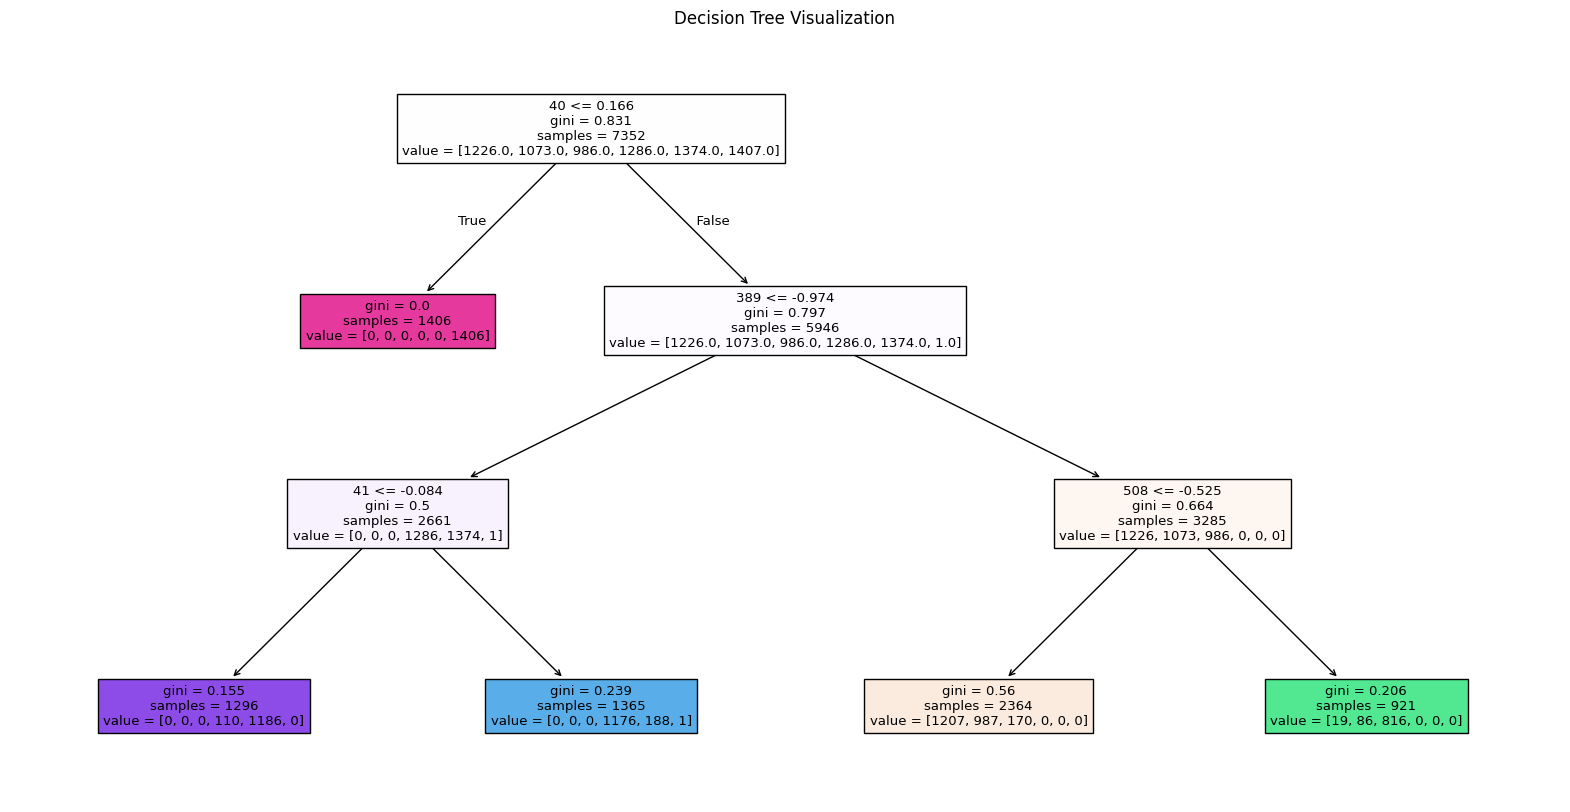

Accuracy: 0.7217509331523583
Precision: 0.6703991677890485
Recall: 0.7217509331523583
Confusion Matrix:
[[485   0  11   0   0   0]
 [463   0   8   0   0   0]
 [138   0 282   0   0   0]
 [  0   0   0 400  91   0]
 [  0   0   0 109 423   0]
 [  0   0   0   0   0 537]]
Tree of Depth : 4


c:\Users\Arjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


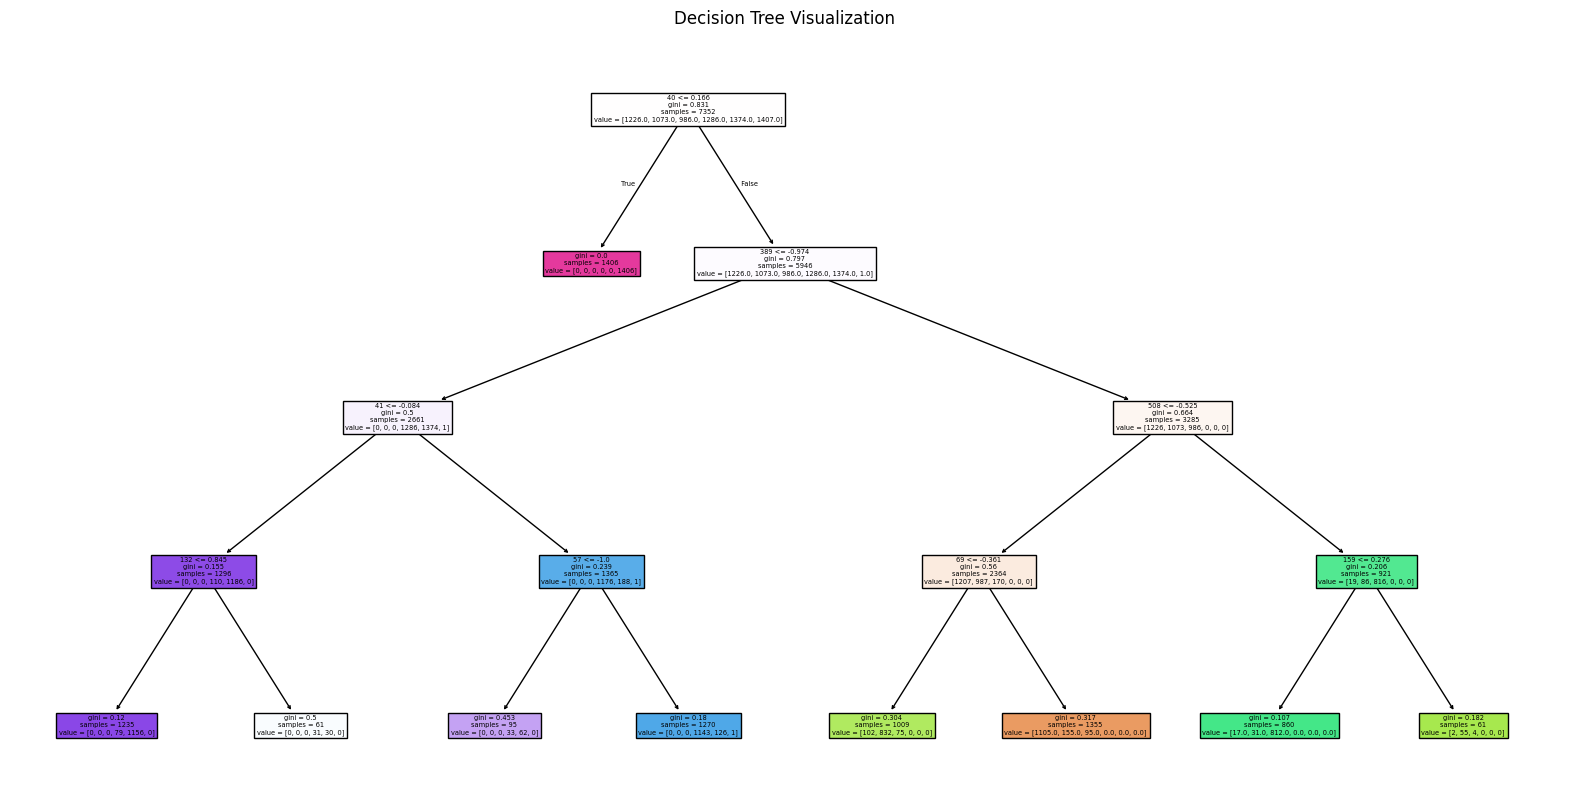

Accuracy: 0.8282999660671869
Precision: 0.8385664733180174
Recall: 0.8282999660671869
Confusion Matrix:
[[453  32  11   0   0   0]
 [ 88 377   6   0   0   0]
 [ 82  77 261   0   0   0]
 [  0   0   0 397  94   0]
 [  0   0   0 116 416   0]
 [  0   0   0   0   0 537]]
Tree of Depth : 5


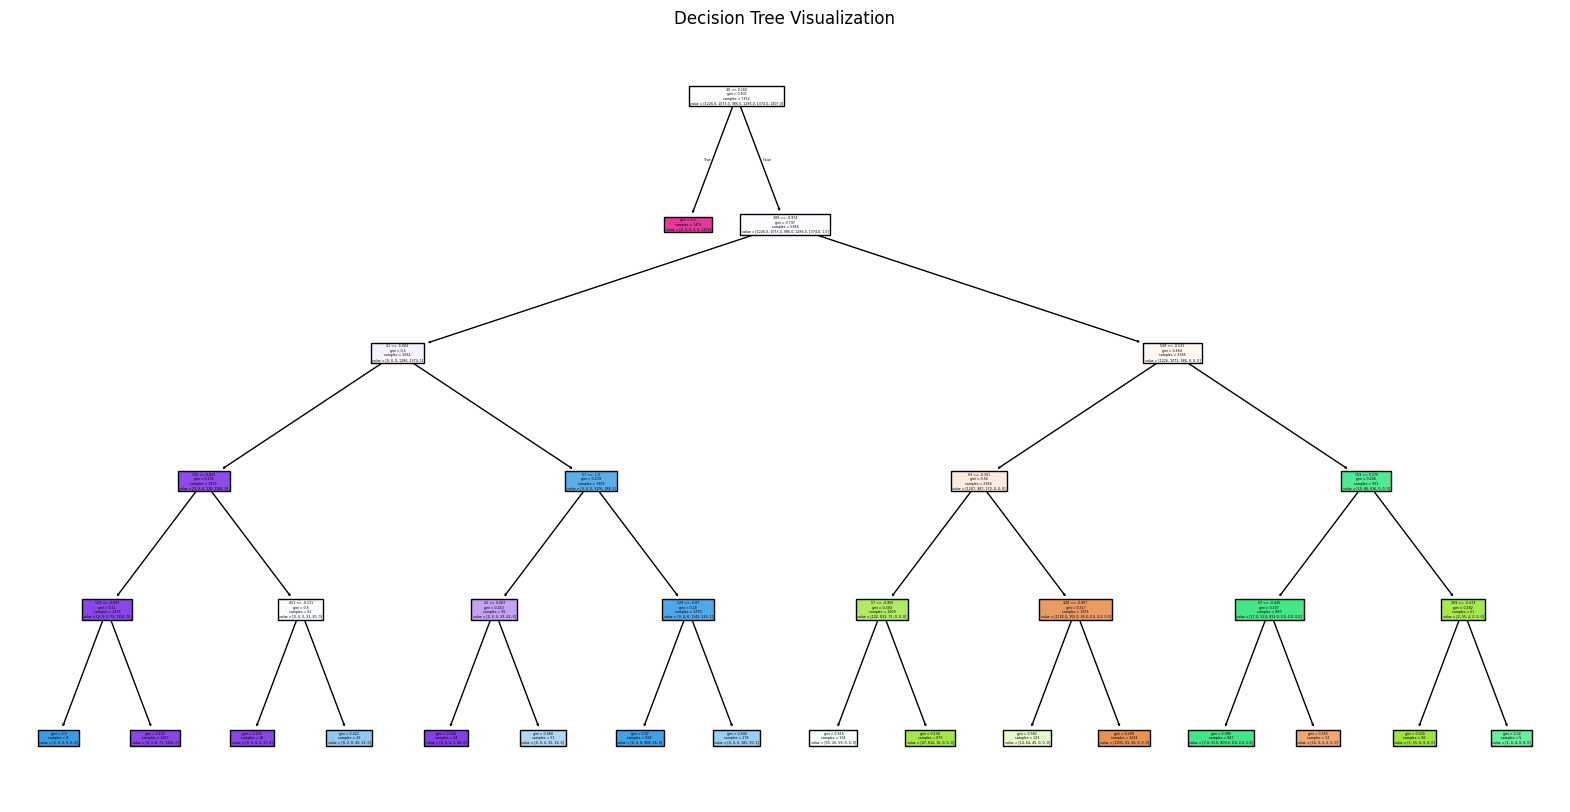

Accuracy: 0.830335934848999
Precision: 0.8301229797802715
Recall: 0.830335934848999
Confusion Matrix:
[[447  17  32   0   0   0]
 [ 44 369  58   0   0   0]
 [ 38 116 266   0   0   0]
 [  0   0   0 412  79   0]
 [  0   0   0 116 416   0]
 [  0   0   0   0   0 537]]
Tree of Depth : 6


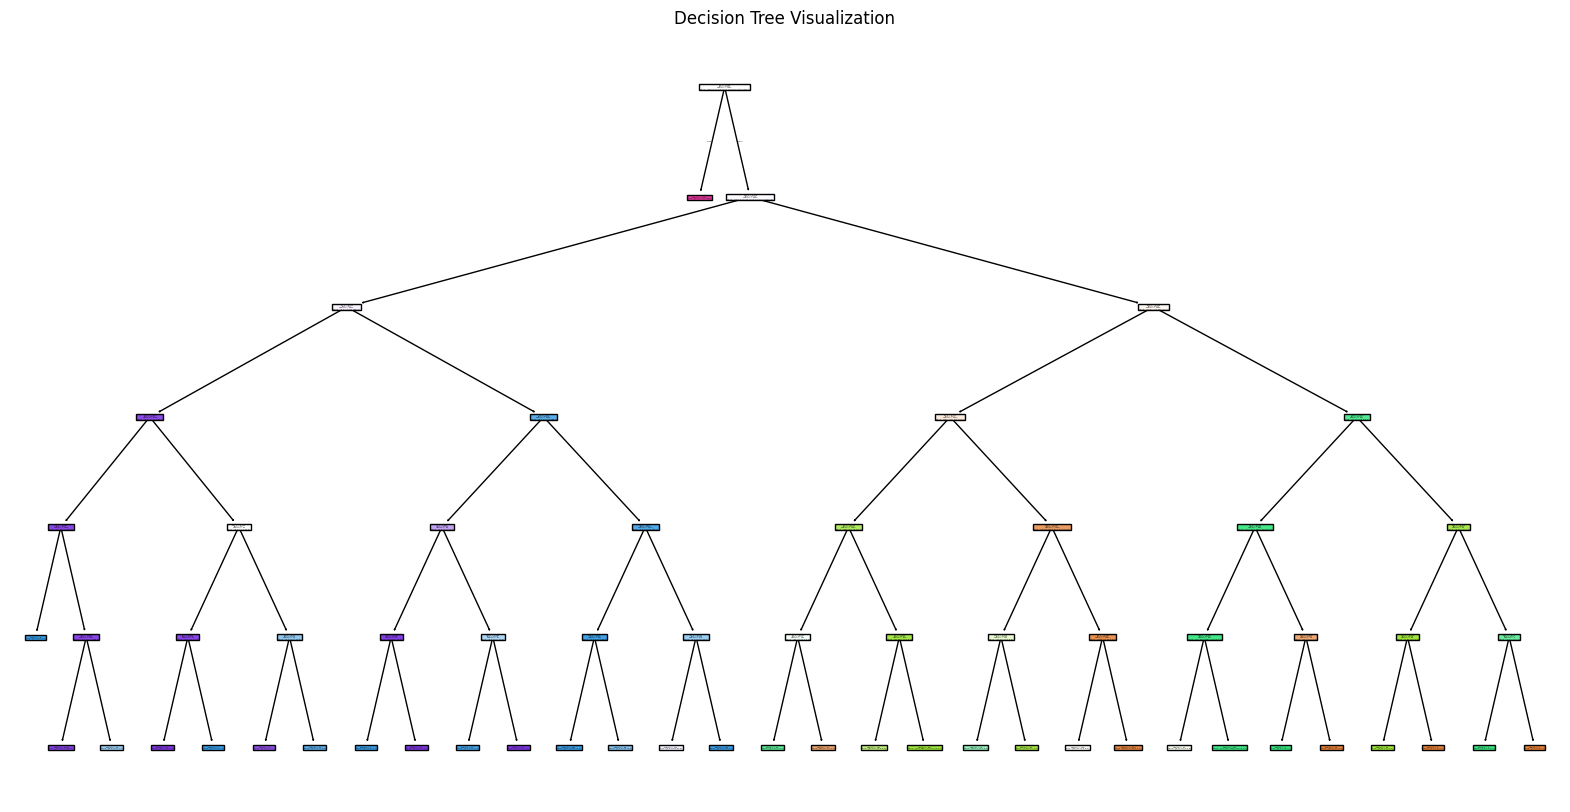

Accuracy: 0.8527315914489311
Precision: 0.858025888852196
Recall: 0.8527315914489311
Confusion Matrix:
[[458  23  15   0   0   0]
 [ 86 358  27   0   0   0]
 [ 12  91 317   0   0   0]
 [  0   0   0 351 140   0]
 [  0   0   0  40 492   0]
 [  0   0   0   0   0 537]]
Tree of Depth : 7


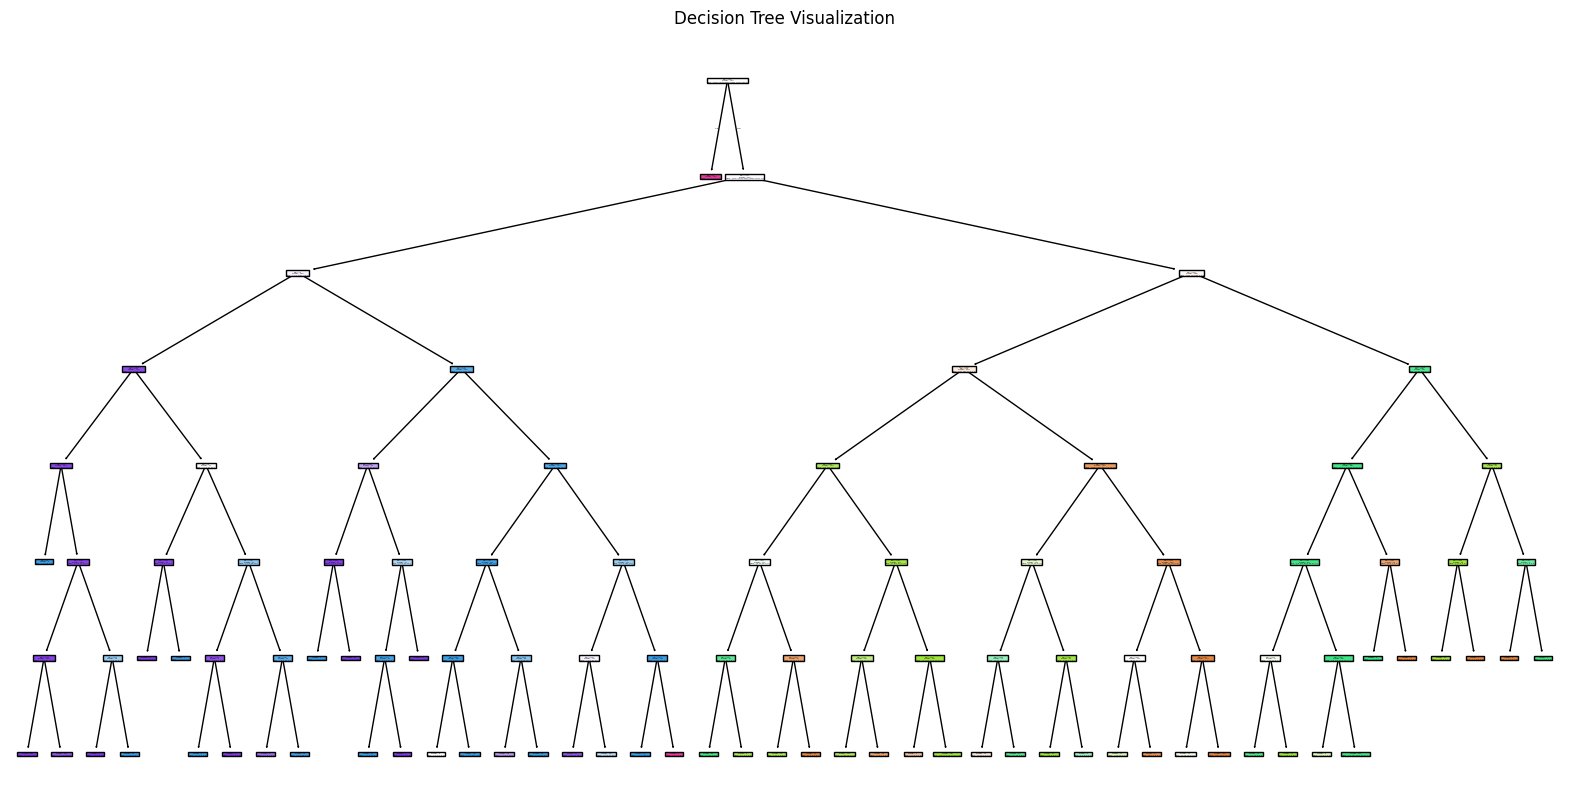

Accuracy: 0.833729216152019
Precision: 0.8371536956215797
Recall: 0.833729216152019
Confusion Matrix:
[[465  20  11   0   0   0]
 [127 319  25   0   0   0]
 [ 21  94 305   0   0   0]
 [  0   0   0 385 106   0]
 [  0   0   0  86 446   0]
 [  0   0   0   0   0 537]]
Tree of Depth : 8


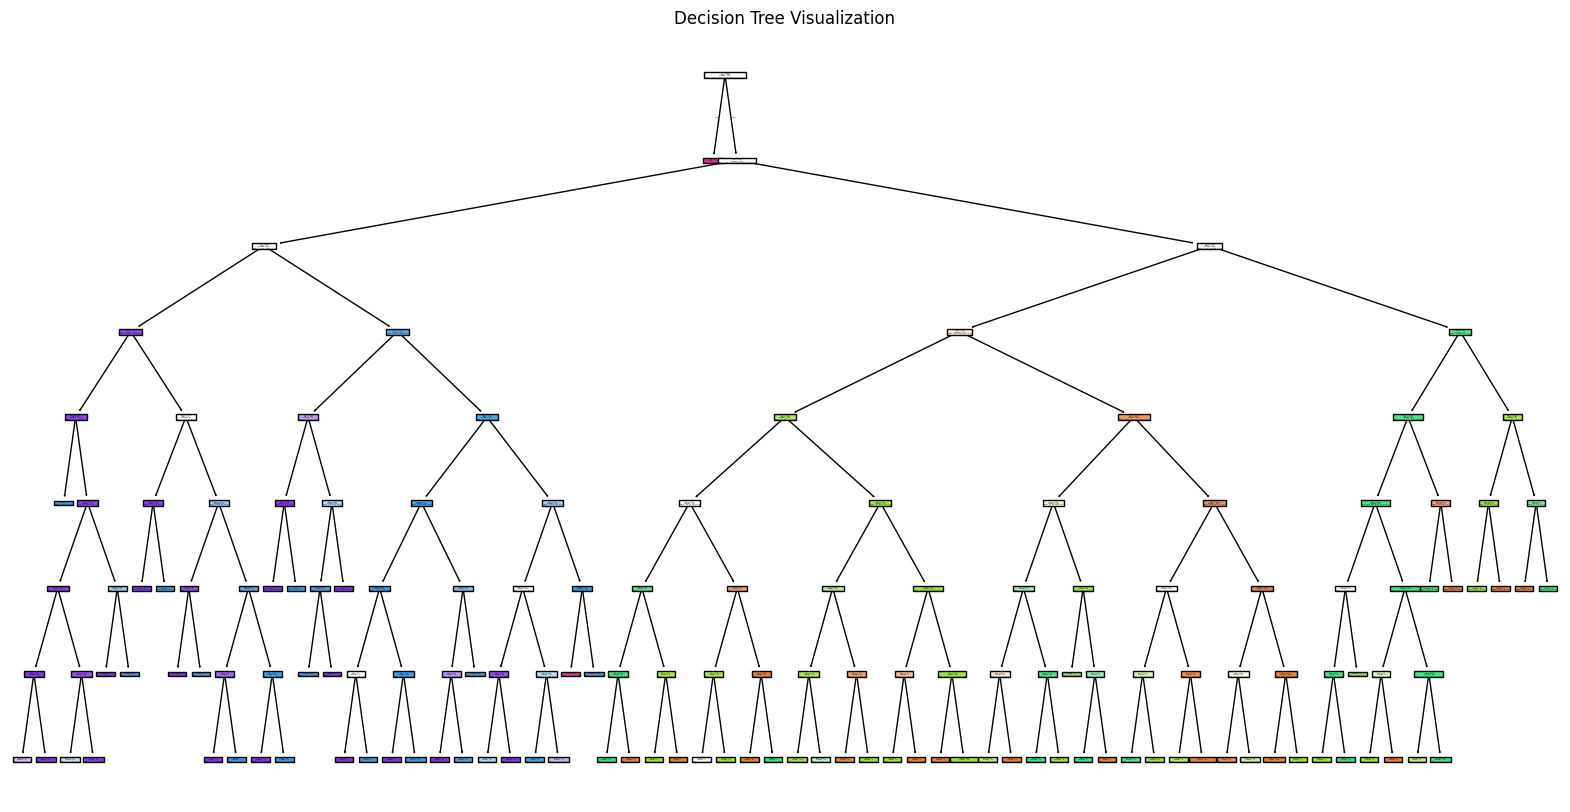

Accuracy: 0.8605361384458772
Precision: 0.8627923721967978
Recall: 0.8605361384458772
Confusion Matrix:
[[464  13  19   0   0   0]
 [ 93 354  24   0   0   0]
 [ 18  73 329   0   0   0]
 [  0   0   0 378 112   1]
 [  0   0   0  58 474   0]
 [  0   0   0   0   0 537]]


In [59]:
for i in range(2,9):
    print("Tree of Depth :",i)
    decision_tree_features(depth = i)